# <p style="text-align: center;">Основное задание</p>
###  Разработать отчет, определяющий категории товаров, наиболее популярные перед Новым годом. Если популярных категорий товаров больше, чем одна, отчет должен показывать их все. Предновогодним периодом будем считать срок с 1 по 31 декабря.<br><br>

**1. При необходимости, установим необходимые библиотеки**

In [1]:
# уберите комментарии на двух строчках ниже и запустите эту ячейку, если у вас не уставновлены библиотеки: "matplotlib" и "pandas"
#!pip install matplotlib
#!pip install pandas

     ---------------------------------------- 7.7/7.7 MB 751.8 kB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     -------------------------------------- 15.8/15.8 MB 793.9 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 182.8/182.8 KB 355.8 kB/s eta 0:00:00
     -------------------------------------- 56.2/56.2 KB 417.8 kB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
     ---------------------------------------- 2.5/2.5 MB 493.4 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\1\PycharmProjects\working_test_tasks\task_test_croc_2024\venv\Scripts\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 11.6/11.6 MB 1.1 MB/s eta 0:00:00
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)


You should consider upgrading via the 'C:\Users\1\PycharmProjects\working_test_tasks\task_test_croc_2024\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import json
from typing import Dict, Any, List
import matplotlib.pyplot as plt
import pandas as pd

**2. Пропишем неоходимые функции для считывания данных, их обратоки и записи результата в json-файл**

In [3]:
# функия для проверки того, что заказ был совершен в декабре
def is_december_date(date: str) -> bool:
    month = date.split("-", 2)[1]
    if month == "12":
        return True
    else:
        return False

In [4]:
# функция получения данных из json-файла
def get_json_data(file_title: str) -> Dict[str, Any]:
    with open(file_title, encoding="utf8") as f:
        data = json.load(f)
        return data

In [5]:
# функция для получения словаря, ключом которого является название категории,
# a значением - количество совершенных покупок из данной категории
def get_product_categories_stats(orders_data: Dict[str, int]) -> Dict[str, Any]:
    categories_stats = {}
    for order in orders_data:
        order_date = order["ordered_at"]
        if is_december_date(order_date): # проверяем, что заказ был совершен в предновогодний преиод
            shop_basket = order["items"]
            for product in shop_basket:
                category = product["category"]
                category_name = category["name"]
                if category_name not in categories_stats:
                    categories_stats[category_name] = 0
                categories_stats[category_name] += 1
    return categories_stats

In [6]:
# функция получения списка наиболее востребованных категорий
def get_most_popular_categories(categories_stats: Dict[str, int]) -> List[str]:
    most_popular_categories_value = max(categories_stats.values()) # определяем кол-во покупок, совершенной в одной из самых востребованных категорий товаров
    most_popular_categories = []
    for category in categories_stats:
        category_value = categories_stats[category]
        if category_value == most_popular_categories_value:
            most_popular_categories.append(category)
    most_popular_categories.sort()
    return most_popular_categories

In [7]:
# процедура для записи отчета в выходной файл "output_data"
def get_report_json_data(most_popular_categories: List[str]):
    report_data = {
        "categories": most_popular_categories
    }
    with open("output_data.json", "w", encoding="utf8") as f:
        json.dump(report_data, f, indent=4, ensure_ascii=False)

**3. Считаем входные данные из файла и реализуем поставленную задачу, используя функции, описанные выше**

In [8]:
file_title = input("Введите название входного файла для чтения данных: ")
orders_data = get_json_data(file_title=file_title)
categories_stats = get_product_categories_stats(orders_data=orders_data)
most_popular_categories = get_most_popular_categories(categories_stats=categories_stats)
get_report_json_data(most_popular_categories=most_popular_categories)

Введите название входного файла для чтения данных:  format.json


# <p style="text-align: center;">Дополнительное задание</p>
### Визуализировать входные данные и создать dataframe на их основе<br><br>

**1. Выведем график, соответсвующий количеству товаров, приобретенных в каждой из категорий**

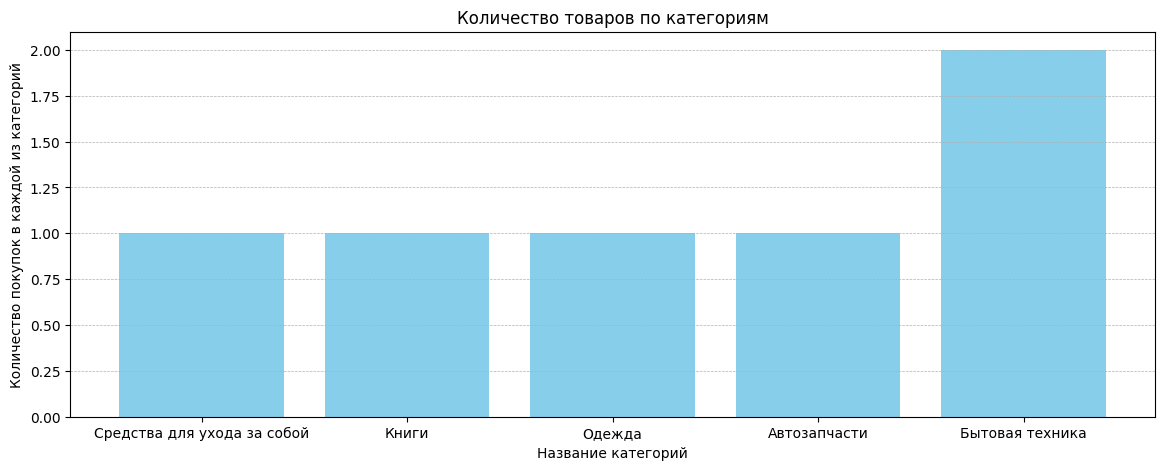

In [9]:
# сортриуем элементы в словаре по значениям по возрастанию
categories_stats_sort = dict(sorted(categories_stats.items(), key=lambda x: x[1]))

x = categories_stats_sort.keys()
y = categories_stats_sort.values()

plt.figure(figsize=(14, 5))
plt.bar(x, y, color='skyblue')
plt.xlabel('Название категорий')
plt.ylabel('Количество покупок в каждой из категорий')
plt.title('Количество товаров по категориям')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

**2. Создадим и заполним массивы с данными о товарах и категориях для dataframe**

In [10]:
product_titles = []
product_ids = []
category_titles = []
category_ids = []

orders_data
for order in orders_data:
        order_date = order["ordered_at"]
        if is_december_date(order_date):
            shop_basket = order["items"]
            for product in shop_basket:
                product_title = product["name"]
                product_id = product["id"]
                category = product["category"]
                category_title = category["name"]
                category_id = category["id"]

                product_titles.append(product_title)
                product_ids.append(product_id)
                category_titles.append(category_title)
                category_ids.append(category_id)

**3. Выводим dataframe, в котором содержится информация о товарах и соответсвующих им категориях**

In [11]:
data = {
    "товар": product_titles,
    "id товара": product_ids,
    "категория": category_titles,
    "id категории": category_ids
}

df = pd.DataFrame(data)
df

,товар,id товара,категория,id категории
0,Игровая приставка Sony Play Station 5,b250ed3c-25d7-462b-9aae-4cae6db4e1e5,Бытовая техника,e3386407-3918-422a-b128-ad23a2ddf9c3
1,Набор уходовых средств Obagi,bd4395cc-6602-4206-bc7a-01a8c5b1eef9,Средства для ухода за собой,0bf9cb4d-30db-4440-a9dc-37edb0e78684
2,"Богатый папа, бедный папа",3975d9a4-1adc-4eab-baf1-55b59e78136d,Книги,8b9bb003-6d90-43c4-9158-cfeca24b20f8
3,Телевизор LG C3,e188a4ce-d1c9-45b9-b757-4e9bcfc7281a,Бытовая техника,e3386407-3918-422a-b128-ad23a2ddf9c3
4,Лонгслив SUPREME x CROC,a57548eb-9a1d-4d2c-8397-9d0c2c60fce6,Одежда,593d36d5-1d8b-4237-beb4-e1c8e361c335
5,Набор зимней резины Pirelli,b8822fc1-b442-430c-9120-a3a1cedcb573,Автозапчасти,3d400f36-2766-40dc-95dd-f82cf3eef6f3
